[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dfbeltran/cursotomadecisiones/blob/main/An%C3%A1lisis_cl%C3%BAster_y_an%C3%A1lisis_de_anomal%C3%ADas.ipynb)

# Análisis clúster y análisis de anomalías

## 1. Introducción
Una de las tareas del análisis de datos consiste en la identificación de agrupaciones naturales de individuos.

Para esto, normalmente se cuenta con una base de datos cuyas fílas son los individuos de interés
(personas, empresas, transacciones, etc.) y las columnas son sus características. Esto último, que existan muchas variables por cada registro, es muy relevante en esta parte del curso y justifíca el uso de metodologías

multivariadas de agrupación. Estas técnicas usualmente se grupan bajo el título de análisis clúster.
Para el aprendizaje de máquina (machine learning) el análisis clúster hace parte del aprendizaje no
supervisado porque no se tienen concepciones a priori sobre cómo conformar los grupos.

## 2. Análisis clúster

El objetivo del análisis clúster es la identificación de grupos de individuos (o de variables) en conjuntos de datos multidimensionales. Los individuos (variables) que pertenecen a un mismo grupo deben ser parecidos, mientras que los grupos deben ser diferentes entre sí. Aquí, el concepto de parecido (o diferente) dependende de algún tipo de distancia entre las observaciones.
El análisis clúster es popular siempre que exista interes en grupos de individuos (variables). Por ejemplo, en mercadeo, es importante hacer segmentaciones de clientes de acuerdo con sus características para después aplicar estrategias de ventas diferentes enfocadas a cada subgrupo.
En la práctica, se deben tener en cuenta las siguientes recomendaciones:
* En los datos, los elementos que se quieren agrupar deben estar organizados por fílas, mientras que las caracterésticas que definen a estos elementos van por columnas.
* Se debe evitar la presencia de valores perdidos. Si existen se deben imputar o eliminar la observación, teniendo muy en cuenta las posibles consecuencias en términos de sesgo en los datos.
* Las variables deben tener escalas similares.

Con respecto al último punto, los algoritmos de clustering, en general, son sensibles a la escala de las variables. Por ejemplo, en una base de datos de países, se pueden tener como variables el producto interno bruto (PIB) y el crecimiento. Aquí, el PIB suele venir en unidades monetarias, y tener valores incluso de billones, mientras que el crecimiento es un porcentaje. De esta forma, la escala de las variables es muy diferente y el algoritmo tenderá a agrupar con base en la variable de mayor escala, en este caso el PIB. Para evitar esto, las variables pueden estandarizarse (llevar a series con media 0 y varianza 1) o reescalarse (todas tienen el mismo mínimo y máximo).

> **📝 Nota:** Los procesos de estandarización o reescalamiento no aplican si las variables que describen al individuo son categóricas. En este caso, se debe recurrir a opciones distintas como la construcción de variables dummys (dicotómicas, de ceros y unos) o utilizar medidas de distancia capaces de tratar con este tipo de información.

## 2.1. Medidas de distancia

La distancia entre dos observaciones mide su cercanía (como era de esperar). Para un grupo de individuos, se puede obtener una matriz que contenga la distancia entre todos ellos. Como resultado, la matriz de distancias es cuadrada (igual número de filas y columnas) y tiene ceros en su diagonal principal.

La distancia entre un par de individuos 1 y 2, definidos a partir de p variables $x_{1i}, x_{2i}, ... x_{pi}$ con $i = 1,2$ se puede calcular como:

* Distancia Euclídea: $d (x_1, x_2) = \sqrt{\sum_{j=1}^{p} (x_{j1}-x_{j2})^2}$.
* Distancia Manhattan (o del taxista):  $d (x_1, x_2) = \sum_{j=1}^{p} |x_{j1}-x_{j2}|$.
* Distancia de Mahalanobis: $d (x_1, x_2) = \sqrt{{(x_{j1}-x_{j2})^T} * {\Sigma}^{-1} (x_{1}-x_{2})}$ donde $\Sigma$ es la matriz de varianzas y covarianzas entre $x_1$ y $x_2$.

También existen otras medidas basadas en la correlacion entre individuos que son utilizadas en contextos
específicos. En este caso, se considera que dos individuos son parecidos si tienen una alta correlación en sus características, aún cuando los valores que éstas tomen sean muy diferentes:
* Distancia de correlación Pearson: $d (x_1, x_2) = 1 - \dfrac{\sum_{j=1}^{p} (x_{j1} - \bar x)(x_{j2} - \bar x)}{\sqrt{\sum_{j=1}^{p} (x_{j1} - \bar x)^2(x_{j2} - \bar x)^2}}$.

Muchas de las medidas de distancia aplican únicamente a variables numéricas, pero en la práctica es
usual que las características de los individuos estén definidas como series ordinales o incluso categoricas.

Para estos casos se ha desarrollado la distancia de Gower, que agrupa las variables de un conjunto de datos de acuerdo con su naturaleza y aplica las medidas de distancias pertinentes según cada caso: para variables numéricas y ordinales se utiliza la distancia Manhattan (con un ajuste por empates para el segundo caso), y para variables nominales con k categorías se generan k variables indicadoras (dicotómicas) y luego se aplican medidas de similaridad adecuadas. Las distancias de cada caso se combinan de manera lineal, usualmente como un promedio simple.

### 2.1.1. Carga y exploración de datos
A continuación se utilizarán datos empresariales con informacion de estados financieros. En primera instancia, se cargan y exploran los datos, para esto se utilizará la libreria de Pandas:


In [ ]:
# Clonar repo de Git
!git clone https://github.com/dfbeltran/cursotomadecisiones.git

Cloning into 'cursotomadecisiones'...
remote: Enumerating objects: 135, done.
remote: Counting objects: 100% (135/135), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 135 (delta 45), reused 111 (delta 24), pack-reused 0
Receiving objects: 100% (135/135), 32.39 MiB | 19.25 MiB/s, done.
Resolving deltas: 100% (45/45), done.


In [ ]:
# Importar librerias que se van a usar
import pandas as pd
from functools import reduce
import numpy as np

# Cargar los datos
caratula = pd.read_csv('/content/cursotomadecisiones/datos/tema_4/Supersociedades SIREM 201706 - Caratula.csv',
                       encoding='latin-1', # Tipo de codificación del archivo (latin-1 dado a que tiene comas)
                       sep = ';') # Seleccionar separador 

efe = pd.read_csv('/content/cursotomadecisiones/datos/tema_4/Supersociedades SIREM 201706 - EFE.csv',
                       encoding='latin-1',
                       sep = ';')

eri = pd.read_csv('/content/cursotomadecisiones/datos/tema_4/Supersociedades SIREM 201706 - ERI.csv',
                       encoding='latin-1',
                       sep = ';')

esf = pd.read_csv('/content/cursotomadecisiones/datos/tema_4/Supersociedades SIREM 201706 - ESF.csv',
                       encoding='latin-1',
                       sep = ';')

ori = pd.read_csv('/content/cursotomadecisiones/datos/tema_4/Supersociedades SIREM 201706 - ORI.csv',
                       encoding='latin-1',
                       sep = ';')

In [ ]:
caratula.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15955 entries, 0 to 15954
Data columns (total 12 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   NIT                                                            15955 non-null  int64 
 1   FECHA CORTE                                                    15955 non-null  object
 2   Razón social de la sociedad                                    15955 non-null  object
 3   Corte de cuentas según estatutos                               15955 non-null  object
 4   Estado actual                                                  15955 non-null  object
 5   Clasificación Industrial Internacional Uniforme Versión 4 A.C  15955 non-null  object
 6   Tipo societario                                                15955 non-null  object
 7   La sociedad es                                                 1595

In [ ]:
efe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16027 entries, 0 to 16026
Data columns (total 57 columns):
 #   Column                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                         --------------  -----  
 0   NIT                                                                                                                            16027 non-null  int64  
 1   FECHA CORTE                                                                                                                    16027 non-null  object 
 2   DURACION                                                                                                                       16027 non-null  object 
 3   (+/-) Ganancia (pérdida)                                                                                  

In [ ]:
eri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16005 entries, 0 to 16004
Data columns (total 19 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Nit                                                          16005 non-null  int64  
 1   Fecha Corte                                                  16005 non-null  object 
 2   Duracion                                                     16005 non-null  object 
 3   Ingresos de actividades ordinarias                           16005 non-null  float64
 4   Costo de ventas                                              13633 non-null  float64
 5   Ganancia bruta                                               16005 non-null  float64
 6   Otros ingresos                                               16005 non-null  float64
 7   Gastos de ventas                                             11296 non-null 

In [ ]:
esf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15988 entries, 0 to 15987
Data columns (total 64 columns):
 #   Column                                                                                                                                                                                                                  Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                  --------------  -----  
 0   Nit                                                                                                                                                                                                                     15988 non-null  int64  
 1   Fecha Corte                                                                                                                                            

In [ ]:
ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16009 entries, 0 to 16008
Data columns (total 12 columns):
 #   Column                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                           --------------  -----  
 0   Nit                                                                                                              16009 non-null  int64  
 1   Fecha Corte                                                                                                      16009 non-null  object 
 2   Duracion                                                                                                         16009 non-null  object 
 3   Ganancia (pérdida)                                                                                               16005 non-null  float64
 4   Otro resultado integral, neto de i

A continuación se unen los archivos utilizando como llave el numero de identificación tributaria (NIT) de las empresas. Aquí, se debe notar que la variable identificadora se llama NIT para los elementos Caratula y efe y Nit para los elementos esf y ori, con lo cual se debe estandarizar el nombre.

Una de las buenas practicas cuando se trabaja con bases de datos relacionales es minimizar todas las columnas y reemplazar los espacios por un guión bajo ( _ ), esto facilitá luego autocompletar cuando se usa un IDE. 

In [ ]:
def df_bajas_guion_bajo(df):
    '''
    Convierte las columnas de un DataFrame a bajas y transforma
    los espacios en guiones bajo 

    Args:
        df (pd.DataFrame) : El dataframe al que se le aplicará la transformación

    Returns:
        df (pd.DataFrame): El dataframe transformado

    '''   
    df.columns = df.columns.str.lower().str.replace(' ','_')
    return df

In [ ]:
# Mapea función a todos los dataframes
caratula, efe, eri, esf, ori = map(df_bajas_guion_bajo, [caratula, efe, eri, esf, ori]) 

In [ ]:
efe

,nit,fecha_corte,duracion,(+/-)_ganancia_(pérdida),(+/-)_ajustes_por_gastos_por_impuestos_a_las_ganancias,(_+_)_ajustes_por_gastos_de_depreciación_y_amortización,(+/-)_ajustes_por_deterioro_de_valor_(reversiones_de_pérdidas_por_deterioro_de_valor)_reconocidas_en_el_resultado_del_periodo,(+)_ajustes_por_provisiones,(+)_ajustes_por_costos_financieros,(+/-)_ajustes_por_pérdidas_(ganancias)_de_moneda_extranjera_no_realizadas,(+/-)_ajustes_por_pérdidas_(ganancias)_del_valor_razonable,(-)_ajustes_por_ganancias_no_distribuidas_de_asociadas,(+/-)_ajustes_por_pérdidas_(ganancias)_por_la_disposición_de_activos_no_corrientes,(+/-)_otros_ajustes_para_conciliar_la_ganancia_(pérdida),total_ajustes_para_conciliar_la_ganancia_(pérdida),(+/-)_ajustes_por_disminuciones_(incrementos)_en_los_inventarios,(+/-)_ajustes_por_la_disminución_(incremento)_de_cuentas_por_cobrar_de_origen_comercial,(+/-)_ajustes_por_disminuciones_(incrementos)_en_otras_cuentas_por_cobrar_derivadas_de_las_actividades_de_operación,(+/-)_ajustes_por_el_incremento_(disminución)_de_cuentas_por_pagar_de_origen_comercial,(+/-)_ajustes_por_incrementos_(disminuciones)_en_otras_cuentas_por_pagar_derivadas_de_las_actividades_de_operación,(+/-)_otras_entradas_(salidas)_de_efectivo,flujos_de_efectivo_netos_procedentes_de_(utilizados_en)_actividades_de_operación,(+)_flujos_de_efectivo_procedentes_de_la_pérdida_de_control_de_subsidiarias_u_otros_negocios,(-)_flujos_de_efectivo_utilizados_para_obtener_el_control_de_subsidiarias_u_otros_negocios,(+)_otros_cobros_por_la_venta_de_patrimonio_o_instrumentos_de_deuda_de_otras_entidades,(-)_otros_pagos_para_adquirir_patrimonio_o_instrumentos_de_deuda_de_otras_entidades,(+)_otros_cobros_por_la_venta_de_participaciones_en_negocios_conjuntos,(-)_otros_pagos_para_adquirir_participaciones_en_negocios_conjuntos,"(+)_importes_procedentes_de_la_venta_de_propiedades,_planta_y_equipo","(-)_compras_de_propiedades,_planta_y_equipo",(+)_importes_procedentes_de_ventas_de_activos_intangibles,(-)_compras_de_activos_intangibles,(+)_recursos_por_ventas_de_otros_activos_a_largo_plazo,(-)_compras_de_otros_activos_a_largo_plazo,"(-)_pagos_derivados_de_contratos_de_futuro,_a_término,_de_opciones_y_de_permuta_financiera","(+)_cobros_procedentes_de_contratos_de_futuro,_a_término,_de_opciones_y_de_permuta_financiera",(+)_dividendos_recibidos,(+)_intereses_recibidos,(+/-)_otras_entradas_(salidas)_de_efectivo.1,flujos_de_efectivo_netos_procedentes_de_(utilizados_en)_actividades_de_inversión,(+)_importes_procedentes_de_aumento_de_capital_y/o_recolocación_de_acciones,(-)_disminución_de_capital_social_y/o_readquisición_de_acciones,(-)_pagos_por_otras_participaciones_en_el_patrimonio,(+)_importe_procedente_del_aumento_prima_por_emisión,(-)_disminución_de_prima_por_emisión,(+)_importes_procedentes_de_préstamos,(-)_reembolsos_de_préstamos,(-)_pagos_de_pasivos_por_arrendamientos_financieros,(-)_dividendos_pagados,(-)_intereses_pagados,(+/-)_otras_entradas_(salidas)_de_efectivo.2,flujos_de_efectivo_netos_procedentes_de_(utilizados_en)_actividades_de_financiación,"incremento_(disminución)_neto_de_efectivo_y_equivalentes_al_efectivo,_antes_del_efecto_de_los_cambios_en_la_tasa_de_cambio",(+/-)_efectos_de_la_variación_en_la_tasa_de_cambio_sobre_el_efectivo_y_equivalentes_al_efectivo,incremento_(disminución)_neto_de_efectivo_y_equivalentes_al_efectivo,efectivo_y_equivalentes_al_efectivo_al_principio_del_periodo,efectivo_y_equivalentes_al_efectivo_al_final_del_periodo
0,800000090,31/12/2016,2016,12469.0,NaN,167834.0,NaN,NaN,NaN,NaN,NaN,NaN,66795.0,NaN,234629.0,-17838.0,-182132.0,NaN,-42904.0,228693.0,38158.0,271075.0,NaN,NaN,4500.0,NaN,NaN,NaN,NaN,133033.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-150461.0,-278994.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7919.0,NaN,-7919.0,23134.0,15215.0
1,800000268,31/12/2016,2016,15955.0,-12380.0,126463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114083.0,4076.0,0.0,-3341.0,73974.0,-228532.0,NaN,-23785.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [ ]:
# Unir todos los DataFrames
df_financial = reduce(lambda  left,right: pd.merge(left,right,on=['nit','fecha_corte', 'duracion'], how='inner', suffixes=('', '_y')), [efe, eri, ori])
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['nit','fecha_corte'], how='inner'), [caratula, esf, df_financial])
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16060 entries, 0 to 16059
Columns: 154 entries, nit to total_otro_resultado_integral_que_se_reclasificará_al_resultado_del_periodo,_neto_de_impuestos
dtypes: float64(132), int64(9), object(13)
memory usage: 19.0+ MB


A continuación se seleccionan las características sobre las cuales se aplicarán los algoritmos de clasificación y se analiza el tipo de cada variables mediante el comando `dtype`

In [ ]:
columnas = ['nit', 'razón_social_de_la_sociedad', 'estado_actual',
 'clasificación_industrial_internacional_uniforme_versión_4_a.c',
 'tipo_societario', 'departamento_de_la_dirección_de_notificación_judicial',
 'ciudad_de_la_dirección_de_notificación_judicial','activos_corrientes_totales',
 'total_de_activos_no_corrientes','total_de_activos','pasivos_corrientes_totales',
 'total_de_pasivos_no_corrientes','total_pasivos','patrimonio_total',
 'ingresos_de_actividades_ordinarias','costo_de_ventas','ganancia_bruta',
 'otros_ingresos', 'gastos_de_ventas', 'gastos_de_administración', 'otros_gastos',
 'ganancia_(pérdida)_por_actividades_de_operación','ingresos_financieros',
 'costos_financieros','ganancia_(pérdida),_antes_de_impuestos','ganancia_(pérdida)']

new_col_names = ['nit','nombre','estado','ciiu','tipo_soc','dpto','ciudad',
                  'activo_cte','activo_no_cte','activo','pasivo_cte','pasivo_no_cte',
                  'pasivo','patrimonio','ingreso','costo_venta','ganancia_bruta',
                  'otro_ingreso','gasto_venta','gasto_admon','gasto_otro','ganancia_operacion',
                  'ingreso_fin','costo_fin','ganancia_antes_imp', 'ganancia']

In [ ]:
datos = df_merged[columnas].copy()
datos.columns = new_col_names
datos.dtypes

nit                     int64
nombre                 object
estado                 object
ciiu                   object
tipo_soc               object
dpto                   object
ciudad                 object
activo_cte            float64
activo_no_cte         float64
activo                  int64
pasivo_cte            float64
pasivo_no_cte         float64
pasivo                  int64
patrimonio              int64
ingreso               float64
costo_venta           float64
ganancia_bruta        float64
otro_ingreso          float64
gasto_venta           float64
gasto_admon           float64
gasto_otro            float64
ganancia_operacion      int64
ingreso_fin           float64
costo_fin             float64
ganancia_antes_imp      int64
ganancia                int64
dtype: object

Se construyen algunos indicadores financieros adicionales y se calcula la cantidad de observaciones perdidas en el elemento datos:

In [ ]:
datos['ingreso_activo'] = datos['ingreso']/datos['activo']
datos['ingreso_activo'] = datos['ingreso_activo'].replace(np.inf, 0) # en caso de división por 0 
datos['ingreso_patrimonio'] = datos['ingreso']/datos['patrimonio']
datos['ingreso_patrimonio'] = datos['ingreso_patrimonio'].replace(np.inf, 0) # en caso de división por 0 

Una de las buenas practicas dentro de la industria es reducir el consumo de RAM asignando la precisión númerica correcta, en especial cuando se trabajan con grandes set de datos. Se construye por lo tanto se construye una función que permite reducir el tamaño en RAM del set de datos.

In [ ]:
def load_and_reduce_mem_usage(df):
    """
    Load a dataframe using pandas and reduce memory according to max-min
    in each column
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print(f'Start memory usage of dataframe is {start_mem:.2f} MB')
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object and col_type.name != 'category':
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float32)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')
    
    if df[col].nunique() < 60:
        df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print(f'Memory usage after optimization is {end_mem:.2f} MB')
    delta_memory = (start_mem - end_mem) / start_mem
    print(f'Decreased by {delta_memory:.1%} \n --------')

    return df

In [ ]:
datos = load_and_reduce_mem_usage(datos)

Start memory usage of dataframe is 3.55 MB
Memory usage after optimization is 2.51 MB
Decreased by 29.3% 
 --------


In [ ]:
datos.dtypes

nit                      int32
nombre                category
estado                category
ciiu                  category
tipo_soc              category
dpto                  category
ciudad                category
activo_cte             float32
activo_no_cte          float32
activo                   int64
pasivo_cte             float32
pasivo_no_cte          float32
pasivo                   int32
patrimonio               int64
ingreso                float32
costo_venta            float32
ganancia_bruta         float32
otro_ingreso           float32
gasto_venta            float32
gasto_admon            float32
gasto_otro             float32
ganancia_operacion       int32
ingreso_fin            float32
costo_fin              float32
ganancia_antes_imp       int32
ganancia                 int32
ingreso_activo         float32
ingreso_patrimonio     float32
dtype: object

### 2.1.2. Procesamiento de datos

Como se mencionó anteriormente, para calcular la distancia entre un grupo de individuos se deben estandarizar (o reescalar) sus variables previamente.

En python y particularmente en la industria una de las buenas practicas es usar Pipelines (tuberias) de datos, los pipelines facilitan el preprocesamiento, limpiando código y colapsando todos los pasos de preprocesamiento y modelado en una sola línea de código.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [ ]:
def pipeline_transformacion(df, crear_dummies = False):
    '''
    Pipeline de preprocesamiento
    '''
    columnas_numericas = df.select_dtypes('number').columns.to_list()

    if 'nit' in columnas_numericas:
        columnas_numericas.remove('nit')

    columnas_categoricas =  df.select_dtypes('category').columns.to_list()

    transformador_numerico =  Pipeline(steps=[('inputar', SimpleImputer(strategy='mean')),
                                              ('scaler', StandardScaler())])
    if crear_dummies:
        scaler = ColumnTransformer(transformers=[('num', transformador_numerico, columnas_numericas),
                                                ('cat', OneHotEncoder(), columnas_categoricas)], 
                                remainder = 'passthrough')
    else: 
        scaler = ColumnTransformer(transformers=[('num', transformador_numerico, columnas_numericas)], 
                                                remainder = 'passthrough')
    
    return scaler.fit(df)

In [ ]:
primeros_10_datos = datos.iloc[[0,1,3,4,5,7,8,9,10,11], :]
transformador = pipeline_transformacion(primeros_10_datos, crear_dummies = False)
primeros_10_datos[['activo','pasivo']]

,activo,pasivo
0,6542076,5352469
1,3419876,2499818
3,6078941,2981565
4,3011514,1656877
5,3338792,1189886
7,3895103,1599243
8,26067582,5874421
9,3668777,1273890
10,58531475,22447935
11,15048091,7511824


In [ ]:
columns = list(transformador.transformers_[0][2]) + list(datos.columns[list(transformador.transformers_[1][2])])
primeros_10_datos_transformados = pd.DataFrame(transformador.transform(primeros_10_datos),
                                               columns=columns)
primeros_10_datos_transformados = primeros_10_datos_transformados.astype({'activo':'float', 'pasivo':'float'})
primeros_10_datos_transformados[['activo','pasivo']]

,activo,pasivo
0,-0.384071,0.018625
1,-0.570908,-0.448756
2,-0.411786,-0.369826
3,-0.595345,-0.586864
4,-0.575760,-0.663376
5,-0.542470,-0.596306
6,0.784363,0.104142
7,-0.556013,-0.649612
8,2.727048,2.819558
9,0.124941,0.372415


Con los Pipelines fue posible transformar todos los datos numéricos, adicionalmente si queremos crear variables dummies para nuestros datos categóricos, lo podemos hacer fácilmente. 

La gran ventaja que tienen los pipelines es que puedo recibir otra base después y las columnas pueden pasar por el mismo proceso, esto es extremadamente útil particularmente en el aprendizaje por refuerzo supervisado cuando se tiene un conjunto de datos para el entrenamiento y otro de pruebas y se le quiere realizar las mismas transformaciones. 

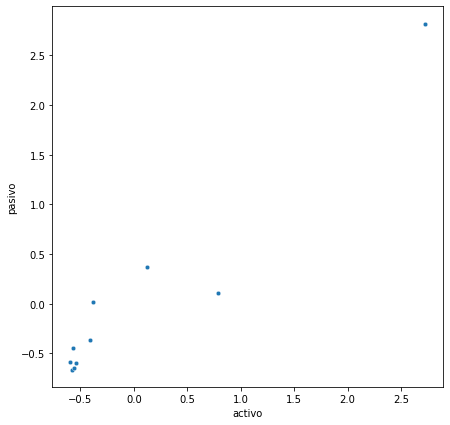

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=primeros_10_datos_transformados, x="activo", y="pasivo", s= 20);

### 2.1.3. Matrices de distancias

La matriz de distancias Euclídeas entre los 10 individuos seleccionados se calcula mediante el la libreria de Sklearn, importando `euclidean_distances`

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

dist_eucl = pd.DataFrame(euclidean_distances(primeros_10_datos_transformados[['activo','pasivo']]))
dist_eucl

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.503341,0.389438,0.641290,0.708427,0.635004,1.171559,0.690004,4.186202,0.619888
1,0.503341,0.000000,0.177623,0.140253,0.214675,0.150266,1.463713,0.201408,4.643101,1.076349
2,0.389438,0.177623,0.000000,0.284252,0.336243,0.261480,1.286630,0.314773,4.474868,0.915968
3,0.641290,0.140253,0.284252,0.000000,0.078979,0.053712,1.543075,0.074057,4.758362,1.199595
4,0.708427,0.214675,0.336243,0.078979,0.000000,0.074877,1.561735,0.024070,4.799934,1.250538
5,0.635004,0.150266,0.261480,0.053712,0.074877,0.000000,1.500371,0.055000,4.728412,1.176375
6,1.171559,1.463713,1.286630,1.543075,1.561735,1.500371,0.000000,1.537776,3.338789,0.711904
7,0.690004,0.201408,0.314773,0.074057,0.024070,0.055000,1.537776,0.000000,4.776362,1.228104
8,4.186202,4.643101,4.474868,4.758362,4.799934,4.728412,3.338789,4.776362,0.000000,3.572040
9,0.619888,1.076349,0.915968,1.199595,1.250538,1.176375,0.711904,1.228104,3.572040,0.000000


La misma matriz pero utilizando la distancia Mahattan se obtiene de importando `manhattan_distances`

In [ ]:
from sklearn.metrics.pairwise import manhattan_distances

dist_man = pd.DataFrame(manhattan_distances(primeros_10_datos_transformados[['activo','pasivo']]))
dist_man

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.654217,0.416165,0.816762,0.873690,0.773330,1.253951,0.840180,5.912052,0.862802
1,0.654217,0.000000,0.238052,0.162545,0.219472,0.175989,1.908168,0.215752,6.566270,1.517019
2,0.416165,0.238052,0.000000,0.400597,0.457524,0.357165,1.670116,0.424014,6.328218,1.278967
3,0.816762,0.162545,0.400597,0.000000,0.096097,0.062318,2.070713,0.102080,6.728815,1.679564
4,0.873690,0.219472,0.457524,0.096097,0.000000,0.100360,2.127640,0.033510,6.785742,1.736492
5,0.773330,0.175989,0.357165,0.062318,0.100360,0.000000,2.027281,0.066850,6.685382,1.636132
6,1.253951,1.908168,1.670116,2.070713,2.127640,2.027281,0.000000,2.094130,4.658102,0.927695
7,0.840180,0.215752,0.424014,0.102080,0.033510,0.066850,2.094130,0.000000,6.752232,1.702982
8,5.912052,6.566270,6.328218,6.728815,6.785742,6.685382,4.658102,6.752232,0.000000,5.049250
9,0.862802,1.517019,1.278967,1.679564,1.736492,1.636132,0.927695,1.702982,5.049250,0.000000


Si se desea incluir la variable categorica `ciiu` se debe recurrir a la distancia Gower. En este caso se utiliza Sklearn no cuenta aun con soporte para esta distancia por lo que importamos la libreria `gower` y usamos la función `gower_matrix`.

In [ ]:
!pip install gower

  Created wheel for gower: filename=gower-0.0.5-py3-none-any.whl size=4231 sha256=c92994a0c29e84c0e033edf268dcea449071a3c6497e0b2786713cd77986bd64
  Stored in directory: /root/.cache/pip/wheels/3e/f9/9a/67122a959a424e9cbb4557a8366c871a30e31cd75f0d003db4
Successfully built gower


In [ ]:
import gower
dist_gow = gower.gower_matrix(primeros_10_datos_transformados[['activo','pasivo','ciiu']], cat_features=[False,False,True])
pd.DataFrame(dist_gow)

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.396809,0.373290,0.412478,0.417836,0.408077,0.458746,0.414538,0.913532,0.418262
1,0.396809,0.000000,0.356852,0.349003,0.354360,0.350308,0.522222,0.354051,0.977008,0.481737
2,0.373290,0.356852,0.000000,0.372521,0.377879,0.368120,0.498703,0.374581,0.953490,0.458219
3,0.412478,0.349003,0.372521,0.000000,0.342621,0.339542,0.537891,0.343285,0.992677,0.164073
4,0.417836,0.354360,0.377879,0.342621,0.000000,0.343092,0.543249,0.336632,0.998035,0.502764
5,0.408077,0.350308,0.368120,0.339542,0.343092,0.000000,0.533490,0.339794,0.988276,0.493005
6,0.458746,0.522222,0.498703,0.537891,0.543249,0.533490,0.000000,0.539950,0.788120,0.425168
7,0.414538,0.354051,0.374581,0.343285,0.336632,0.339794,0.539950,0.000000,0.994737,0.499466
8,0.913532,0.977008,0.953490,0.992677,0.998035,0.988276,0.788120,0.994737,0.000000,0.828604
9,0.418262,0.481737,0.458219,0.164073,0.502764,0.493005,0.425168,0.499466,0.828604,0.000000


Mediante la libreria seaborn se puede generar una representación visual de las distancias entre individuos, tomando como argumento las distancias previamente calculadas:

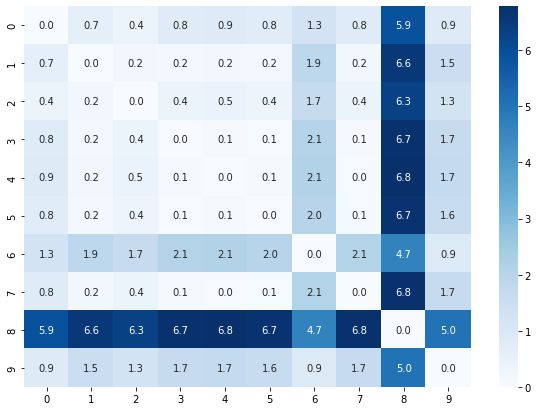

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(dist_man, cmap='Blues', annot=True, fmt='.1f');

## 2.2. Clustering particional

Los métodos de clustering particional buscan clasificar los individuos en uno de varios grupos posibles, generados a partir del conjunto de datos con el que se está trabajando. Para esto se utiliza su similaridad (distancia), tratando que todas las observaciones en un grupo sean parecidas, mientras que los grupos sean diferentes entre sí. En esta sección se presentará el método de K-medias y K-medioides.

### 2.2.1. Clustering por K-medias

El procedimiento de K-medias fue propuesto por MacQueen en 1967, y busca dividir un conjunto de datos en K grupos, maximizando la similaridad intraclase y minimizando la similaridad interclase. Cada grupo está caracterizado por su promedio (p dimensional).

Se define la variación total entre cluster como la suma de las distancias entre los individuos y el centroide del grupo:

<center>$W(C_k) = \sum_{x_i \in c_k} dist(x_i, \mu_k)$</center>

donde $x_i$ es un vector que caracteriza al individuo $i$, $\mu_k$ es el vector de medias para las observaciones que pertenencen al grupo $k$ y $dist$ es una medida de distancia, usualmente la distancia Euclídea. De esta forma, cada registro se asigna a un grupo tal que su distancia al centro del grupo es mínima. Adicionalmente, se
define la variación total entre cluster como:

<center>$VTC = \sum_{k=1}^{K} W(C_k) = \sum_{k=1}^{K} \sum_{x_i \in c_k} dist(x_i, \mu_k)$ </center>

El primer paso en el algoritmo consiste en la selección de K. Posteriormente, los individuos se asignan aleatoriamente para conformar K grupos y se calculan los centroides (mediante medias) respectivos. Tomando los 10 individuos del ejemplo anterior y K = 2 se tiene:

In [ ]:
np.random.seed(777)
cluster = primeros_10_datos_transformados[['activo','pasivo']].copy()
cluster['g1'] = np.random.randint(1, 3, size = cluster.shape[0])

In [ ]:
cluster_centro = cluster.groupby('g1').agg({'activo':'mean', 'pasivo':'mean'})
cluster_centro

,activo,pasivo
g1,,
1,-0.235202,-0.107224
2,0.058800,0.026806


Posteriormente se calculan las distancias (por ejemplo, Euclídea) de los individuos al centroide de cada grupo, y las observaciones se asignan al grupo donde la distancia al centro es menor:

In [ ]:
cluster['dg1'] = np.sqrt(np.square(cluster['activo']-cluster_centro['activo'][1]) + 
                         np.square(cluster['pasivo']-cluster_centro['pasivo'][1]))
cluster['dg2'] = np.sqrt(np.square(cluster['activo']-cluster_centro['activo'][2]) +
                         np.square(cluster['pasivo']-cluster_centro['pasivo'][2]))
cluster['g2'] = 1
cluster['g2'] = np.where(cluster['dg2']< cluster['dg1'], 2, cluster['g2'])
cluster

,activo,pasivo,g1,dg1,dg2,g2
0,-0.384071,0.018625,2,0.194936,0.442947,1
1,-0.570908,-0.448756,2,0.478897,0.789108,1
2,-0.411786,-0.369826,2,0.316451,0.615441,1
3,-0.595345,-0.586864,1,0.599797,0.896937,1
4,-0.575760,-0.663376,2,0.652138,0.937560,1
5,-0.542470,-0.596306,2,0.577594,0.865907,1
6,0.784363,0.104142,2,1.041244,0.729672,2
7,-0.556013,-0.649612,2,0.630163,0.914078,1
8,2.727048,2.819558,2,4.164250,3.862513,2
9,0.124941,0.372415,1,0.599797,0.351881,2


A partir de los nuevos grupos, el procedimiento de cálculo de centroides, cálculo de distancias y asignación en grupos se repite hasta que no haya variación:

In [ ]:
variacion = 1
while variacion > 0: 
    cluster_centro = cluster.groupby('g2').agg({'activo':'mean', 'pasivo':'mean'})
    cluster['dg1'] = np.sqrt(np.square(cluster['activo']-cluster_centro['activo'][1]) + 
                             np.square(cluster['pasivo']-cluster_centro['pasivo'][1]))
    cluster['dg2'] = np.sqrt(np.square(cluster['activo']-cluster_centro['activo'][2]) + 
                             np.square(cluster['pasivo']-cluster_centro['pasivo'][2]))
    grupo = cluster['g2'].copy()
    cluster['g2']= 1
    cluster['g2'] = np.where(cluster['dg2']< cluster['dg1'], 2, cluster['g2'])
    variacion = np.sum(np.square(grupo - cluster['g2']))
    print(variacion)

1
1
0


In [ ]:
cluster

,activo,pasivo,g1,dg1,dg2,g2
0,-0.384071,0.018625,2,0.341665,4.186202,1
1,-0.570908,-0.448756,2,0.300207,4.643101,1
2,-0.411786,-0.369826,2,0.122597,4.474868,1
3,-0.595345,-0.586864,1,0.400385,4.758362,1
4,-0.575760,-0.663376,2,0.443801,4.799934,1
5,-0.542470,-0.596306,2,0.370735,4.728412,1
6,0.784363,0.104142,2,1.164738,3.338789,1
7,-0.556013,-0.649612,2,0.420868,4.776362,1
8,2.727048,2.819558,2,4.358432,0.000000,2
9,0.124941,0.372415,1,0.808283,3.572040,1


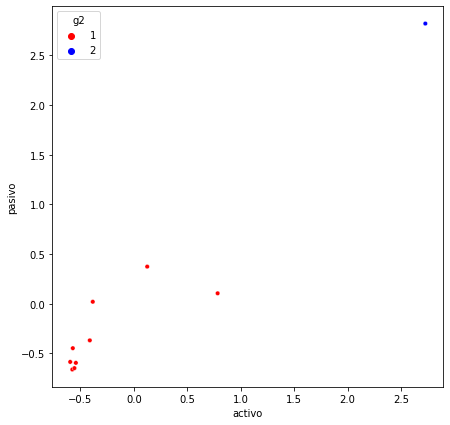

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=cluster, x="activo", y="pasivo", s= 20, hue='g2',  palette=['red','blue']);

Ahora, en python podemos utilizar la libreria Sklearn e importar kmeans. Utilizaremos el elemento datos con las variables activo y pasivo, y generaremos K = 5 grupos:

In [ ]:
filtro = cluster.isna()

In [ ]:
datos[['activo','pasivo','dpto']]

,activo,pasivo,dpto
0,6542076,5352469,ANTIOQUIA
1,3419876,2499818,ATLANTICO
2,141586731,94570079,SANTANDER
3,6078941,2981565,BOGOTA D.C.
4,3011514,1656877,BOGOTA D.C.
...,...,...,...
16055,311709,292284,BOGOTA D.C.
16056,758073,473044,BOGOTA D.C.
16057,87028762,66870040,VALLE
16058,750000,700000,VALLE


In [ ]:
from sklearn.cluster import KMeans

transformador = pipeline_transformacion(datos[['activo','pasivo','dpto']], crear_dummies=False)
cluster = pd.DataFrame(transformador.transform(datos[['activo','pasivo','dpto']]), columns=['activo','pasivo','dpto'])
cluster = cluster[(cluster['dpto']=='VALLE') & (~cluster.isna().any(axis=1))][['activo','pasivo']]

kmeans = KMeans(n_clusters=7, random_state=2021).fit(cluster)

cluster['kmean_cluster'] = kmeans.predict(cluster)


In [ ]:
cluster['kmean_cluster'].value_counts().sort_index()

0    317
1     12
2      4
3     38
4      5
5     98
6    861
Name: kmean_cluster, dtype: int64

Seguramente, la primera inquietud que surge es cómo escoger K. Para esto, se ha propuesto generar clusters con $K = 2, 3, ...,N-1$ (o algún límite superior, usualmente muy por debajo de N-1) y analizar
el comportamiento de la suma de cuadrados al interior para cada caso. 

In [ ]:
!pip install yellowbrick -U

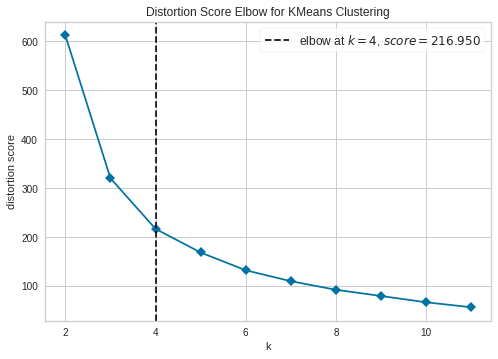

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

transformador = pipeline_transformacion(datos[['activo','pasivo','dpto']], crear_dummies=False)
cluster = pd.DataFrame(transformador.transform(datos[['activo','pasivo','dpto']]), columns=['activo','pasivo','dpto'])
cluster = cluster[(cluster['dpto']=='VALLE') & (~cluster.isna().any(axis=1))][['activo','pasivo']]


# Inicializar el modelo de clustering model y visualizador
model = KMeans(random_state=2021)
visualizer = KElbowVisualizer(model,
                              k=(2,12), 
                              metric='distortion',
                              timings=False,
                              locate_elbow=True)

visualizer.fit(cluster) 
visualizer.show();

Se observa que la medida de error de clasificación disminuye en la medida que aumenta K. Aquí se escoge K en el punto donde se observe un codo, aparentemente en K = 4. Finalmente, se genera la agrupación con K = 4, utilizando la opción n_init = 20 para forzar a que el algoritmo se ejecute 20 veces y escoja el
resultado con mejor desempeño:

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=2021, n_init=20).fit(cluster)
cluster['kmean_cluster'] = kmeans.predict(cluster)
cluster['kmean_cluster'].value_counts().sort_index()

0     163
1      38
2    1130
3       4
Name: kmean_cluster, dtype: int64

In [ ]:
centros = pd.DataFrame(kmeans.cluster_centers_, columns = ['activo','pasivo'])
centros

,activo,pasivo
0,0.438296,0.567829
1,2.085294,2.382735
2,-0.161446,-0.210295
3,6.807999,9.364963


In [ ]:
def plot_cluster_hull(df, name, centers=None):
    from scipy.spatial import ConvexHull

    colors = sns.color_palette("hls", df[name].nunique())

    fig, ax = plt.subplots(1, figsize=(8,8))
    sns.scatterplot(data=df, x="activo", y="pasivo", s= 30, hue=name,
                    palette=colors)
    if centers is not None:
        sns.scatterplot(data = centers, x="activo", y="pasivo", marker='x', s=50,
                        c=['black'])

    for i, c in zip(np.sort(df[name].unique()), colors): 
        try:
            points = df[df[name] == i][['activo', 'pasivo']].values
            hull = ConvexHull(points)
            x_hull = np.append(points[hull.vertices,0],
                            points[hull.vertices,0][0])
            y_hull = np.append(points[hull.vertices,1],
                            points[hull.vertices,1][0])
            plt.fill(x_hull, y_hull, alpha=0.3, c=c)
        except:
            pass

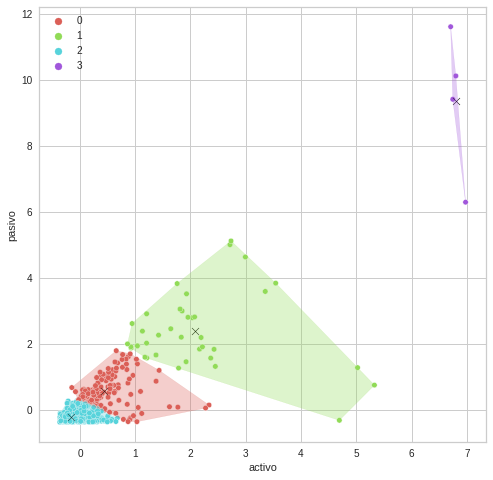

In [ ]:
plot_cluster_hull(cluster, 'kmean_cluster', centros)

A pesar de su versatilidad, el método de clusters por K-medias es sensible a las observaciones atípicas (outliers), a la conformación aleatoria inicial de los grupos y requiere que se decida de antemano la cantidad de grupos a conformar. Por estos motivos, se han desarrollado alternativas que modifican la forma en la que se calculan los centros de cada conjunto, dando estabilidad a los resultados.

### 2.2.2. Clustering por K-medioides

El método de clustering por K-medioides es muy similar al de K-medias, con la diferencia que cada grupo se caracteriza no a partir del promedio de las variables para los individuos que pertenecen al clúster sino por el individuo más central en el grupo. De esta forma, se consigue reducir la sensibilidad del procedimiento a datos atípicos.

El algoritmo más utilizado para el clustering por medioides es el PAM (Partioning Around Medioids). Este procedimiento, primero, selecciona aleatoriamente K elementos para que sean los centros de cada conjunto; segundo, calcula la matriz de distancias de cada elemento no seleccionado a los medioides; tercero, asigna estos elementos a un grupo minimizando su distancia al medioide correspondiente y; cuarto, para cada clúster, intercambia el medioide con algún otro individuo para establecer si de esta forma puede reducir el error de ajuste. Si con el cambio del medioide se consigue mejorar el ajuste, se modifica el medioide y se repite desde el tercer paso hasta conseguir convergencia.

En la matriz de similaridades se puede utilizar la distancia Euclídea o Manhattan.

En el método de K-medioides se deben definir de antemano la cantidad de clústers K.Para apoyar esta tarea, se define $a(i)$ como la similaridad promedio del individuo $i$ con respecto a todos los demás individuos de su clúster. Adicionalmente, se puede calcular la distancia promedio de $i$ con todos los individuos de cualquier otro grupo al cual no pertenezca $i$. Con esto, se define $b(i)$ como la menor distancia promedio entre $i$ y los individuos de un clúster $C$ al cual no pertence $i$. Este grupo se denomina el clúster vecino de $i$. De esta forma, se define silueta como:

<center>$S_{i} = \frac{b(i) - a(i)}{max \text{ } a(i), b(i)}$</center>



De acuerdo con la ecuación, $-1 \le s(i) \le 1$. Un clúster tendrá mejor ajuste siempre que la silueta sea más grande. De esta forma, se puede seleccionar K como el valor que arroja la silueta más alta para el clúster correspondiente.

In [ ]:
!pip install scikit-learn-extra

     |████████████████████████████████| 1.7 MB 5.3 MB/s 


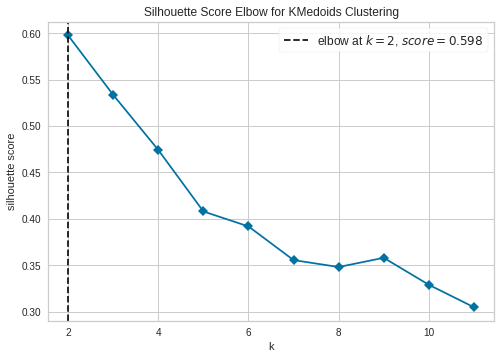

In [ ]:
from sklearn_extra.cluster import KMedoids
from yellowbrick.cluster import SilhouetteVisualizer

# Inicializar el modelo de clustering model y visualizador
model = KMedoids(random_state=2021)
visualizer = KElbowVisualizer(model,
                                  k=(2,12), 
                                  metric='silhouette',
                                  timings= False)

visualizer.fit(cluster[['activo','pasivo']]) 
visualizer.show();

De acuerdo con el gráfico, el indicador de silueta es máximo cuando K = 2. De esta forma, se genera el clúster de K-medioides:

In [ ]:
kmediodes = KMedoids(n_clusters=2, random_state=2021).fit(cluster[['activo','pasivo']])
cluster['kmediod_cluster'] =  kmediodes.predict(cluster[['activo','pasivo']])
cluster['kmediod_cluster'].value_counts()

0    1013
1     322
Name: kmediod_cluster, dtype: int64

In [ ]:
centros_mediodes = pd.DataFrame(kmediodes.cluster_centers_, columns = ['activo','pasivo'])
centros_mediodes

,activo,pasivo
0,-0.227724,-0.252222
1,0.199871,0.315364


In [ ]:
mediod_1 = centros_mediodes.iloc[0]
mediod_2 = centros_mediodes.iloc[1]


In [ ]:
indices = cluster[((cluster['activo'] == centros_mediodes.iloc[0][0]) & (cluster['pasivo'] == centros_mediodes.iloc[0][1]) |
         (cluster['activo'] == centros_mediodes.iloc[1][0]) & (cluster['pasivo'] == centros_mediodes.iloc[1][1]))].index.to_list()

In [ ]:
datos[datos.index.isin(indices)][['activo','pasivo']]

,activo,pasivo
8704,22632421,13339099
8850,5549357,2259187


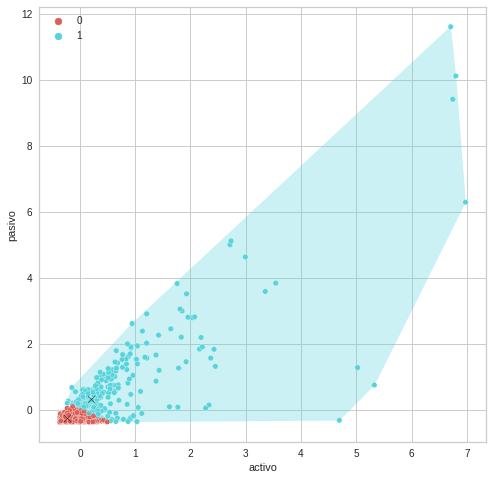

In [ ]:
plot_cluster_hull(cluster, 'kmediod_cluster', centros_mediodes)

### 2.3. Clustering jerárquico

El problema de agrupación de individuos puede resolverse mediante una aproximación diferente a la de clustering particional. En este caso, o se asume que cada individuo es un clúster en sí mismo y se van agrupando consecutivamente buscando generar grupos homogéneos, o se inicia suponiendo que los individuos pertenecen a un único grupo y se van clasificando consecutivamente en conjuntos lo más heterogéneos posibles.

No es necesario conocer de antemano la cantidad de grupos que se quieren generar, pero sí se debe seleccionar una de las tantas particiones que se generan como resultado final.

Típicamente, el resultado de un agrupamiento jerárquico se representa visualmente a través de un dendograma, que es un gráfico en forma de árbol que muestra cómo los grupos se van conformando, ya sea por división o por agrupación

#### 2.3.1. Clustering jerárquico aglomerativo

El clustering aglomerativo, también conocido como AGNES Agglomerative Nesting, es el procedimiento más utilizado en este tipo de metodologías. El algoritmo inicia asumiendo que cada individuo corresponde a un grupo y calcula la matriz de distancias. Posteriormente agrupa los objetos más similares entre sí (menor
distancia) conformando un nuevo conjunto de grupos. Este proceso continúa pero ahora agrupando grupos de individuos según su proximidad (mediante una función de conexión), hasta que todos los individuos pertenezcan a un único grupo. Finalmente, se determina en qué punto de las agrupaciones se hace un corte para llegar a los clústers finales.
    
Son varias las funciones existentes para generar la conexión entre grupos. Entre ellas están:

* Conexión completa: la distancia entre dos grupos es la distancia máxima entre todos los elementos del clúster 1 y el clúster 2. Tiende a generar grupos más compactos.
* Conexión sencilla: la distancia ente dos grupos es la distancia mínima entre todos los elementos del clúster 1 y el clúster 2. Tiende a generar grupos menos compactos.
* Conexión promedio: la distancia ente dos grupos es la distancia promedio entre todos los elementos del clúster 1 y el clúster 2.
* Conexión de centroide: la distancia ente dos grupos es la distancia entre el centroide del clúster 1 y el centroide del clúster 2. En este caso el centroide es el promedio de las variables para todos los elementos en el grupo.
* Método de mínima varianza de Ward: en cada paso une las parejas de grupos

In [ ]:
from sklearn.cluster import AgglomerativeClustering

transformador = pipeline_transformacion(datos[['activo','pasivo','dpto']], crear_dummies=False)
cluster = pd.DataFrame(transformador.transform(datos[['activo','pasivo','dpto']]), columns=['activo','pasivo','dpto'])
cluster = cluster[(cluster['dpto']=='BOYACA') & (~cluster.isna().any(axis=1))][['activo','pasivo']]

cluster_jerarquico = AgglomerativeClustering(affinity = 'euclidean', distance_threshold=0, n_clusters=None, linkage='complete').fit(cluster)

In [ ]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

sns.reset_orig()

def linkeage_dendrogram(model, plot=True, rect = False, **kwargs):
    '''
    Tomado de:
    https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py
    '''
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    if plot:
        fig, ax = plt.subplots(1, 1, figsize=(10, 15))
        ax.set_title("Clustering jerárquico aglomerativo")
        dendrogram(linkage_matrix, ax = ax, **kwargs)

        if rect: 
            for coll in ax.collections[:-1]:  # the last collection is the ungrouped level
                xmin, xmax = np.inf, -np.inf
                ymax = -np.inf
                for p in coll.get_paths():
                    box = p.get_extents()
                    (x0, _), (x1, y1) = p.get_extents().get_points()
                    xmin = min(xmin, x0)
                    xmax = max(xmax, x1)
                    ymax = max(ymax, y1)
                rec = plt.Rectangle((xmin - 4, 0), xmax - xmin + 8, ymax*1.05,
                                    facecolor=coll.get_color()[0], alpha=0.2, edgecolor="none")
                ax.add_patch(rec)

        if 'color_threshold' in kwargs:
            ax.axhline(kwargs.get("color_threshold"), c='r', linestyle='--')

    return linkage_matrix

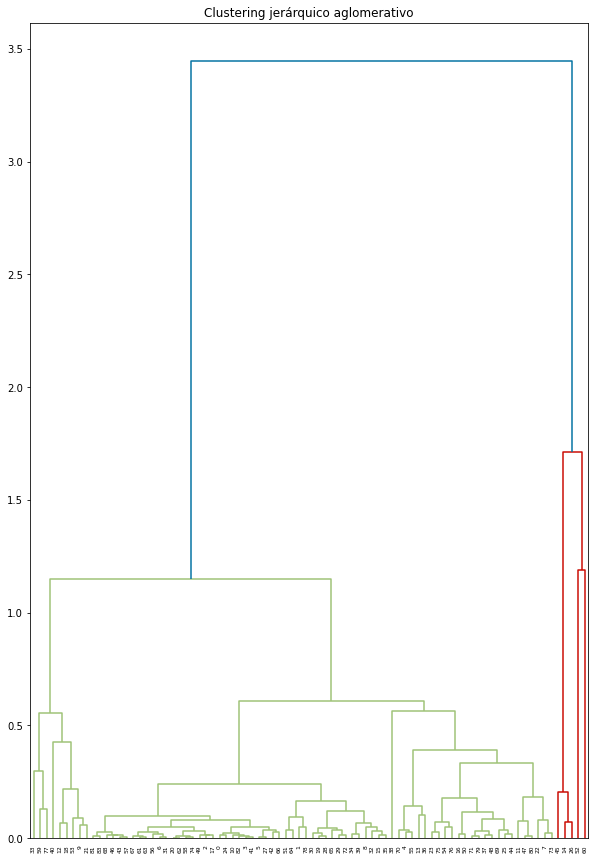

In [ ]:
linkeage_matrix = linkeage_dendrogram(cluster_jerarquico)

Aquí, cada una de las divisiones finales (hojas) corresponde a un individuo y en la medida que nos movemos hacia arriba en el árbol (a través de las ramas) se van generando agrupaciones. Adicionalmente, la altura en el dendograma representa la similaridad a la cual se genera la fusión de cada grupo.

Después de realizar las primeras uniones, es decir, después de conformar grupos directamente entre individuos, las agrupaciones subsecuentes se realizan sobre clústers y estas ya no reflejan necesariamente las distancias originales en los datos. Es por esto que tiene sentido analizar si las distancias en el dendograma
se relacionan con las similaridades originales entre individuos.

Las distancias en el dendograma se pueden obtener mediante el comando cophenetic, y se puede calcular su correlación con las distancias del comando dist:

In [ ]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import cophenet

In [ ]:
dist_org = pdist(cluster)
print(f'Correlación usando complete: {np.corrcoef(cophenet(linkeage_matrix), dist_org)[0,1]}')

cluster_jerarquico_average = AgglomerativeClustering(affinity = 'euclidean', distance_threshold=0, n_clusters=None, linkage='average').fit(cluster)
linkeage_matrix_average = linkeage_dendrogram(cluster_jerarquico_average, plot=False)
print(f'Correlación usando average: {np.corrcoef(cophenet(linkeage_matrix_average), dist_org)[0,1]}')

cluster_jerarquico_ward = AgglomerativeClustering(affinity = 'euclidean', distance_threshold=0, n_clusters=None, linkage='ward').fit(cluster)
linkeage_matrix_ward = linkeage_dendrogram(cluster_jerarquico_ward, plot=False)
print(f'Correlación usando ward: {np.corrcoef(cophenet(linkeage_matrix_ward), dist_org)[0,1]}')

Correlación usando complete: 0.9038889428375273
Correlación usando average: 0.9776614330613399
Correlación usando ward: 0.8568876365790852


Aun cuando el clustering jerárquico genera todo tipo de agrupaciones (desde individuales hasta completas), no dice nada sobre cuál de ellas seleccionar. Una vez se toma la decisión de cúantos grupos se quieren, o a qué altura en el dendograma realizar el corte, se puede utilizar el parametro $\text{n_clusters}$ o $\text{distance_threshold}$ respectivamente . Por ejemplo, utilizando K = 6:

In [ ]:
cluster_jerarquico = AgglomerativeClustering(affinity = 'euclidean', n_clusters=6, linkage='complete', compute_distances=True).fit(cluster)
cluster['cluster_jerarquico'] = cluster_jerarquico.labels_
cluster['cluster_jerarquico'].value_counts().sort_index()

0    25
1     9
2    45
3     1
4     1
5     3
Name: cluster_jerarquico, dtype: int64

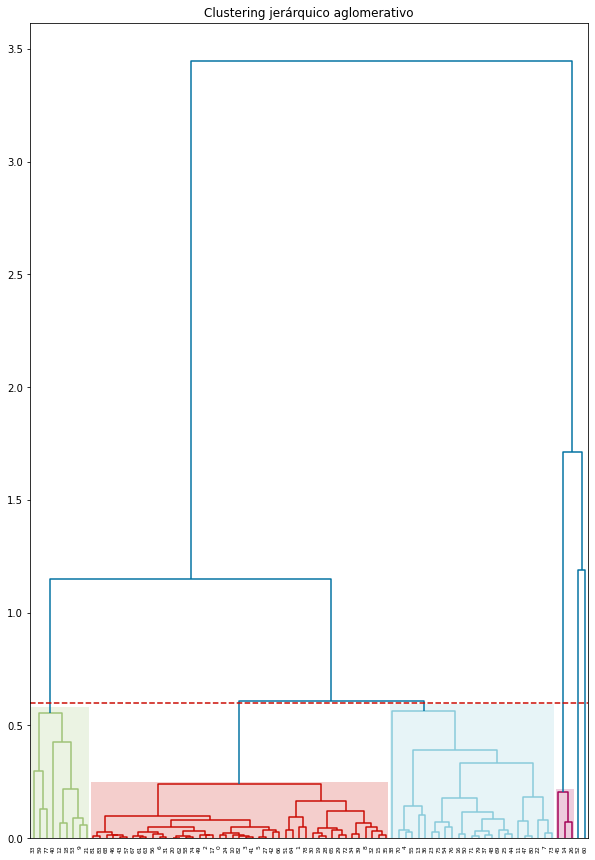

In [ ]:
linkeage_matrix = linkeage_dendrogram(cluster_jerarquico, color_threshold = 0.6, rect = True, plot=True)

Como en los casos anteriores, la visualización de los resultados se obtiene por nuestra función `plot_cluster_hull`

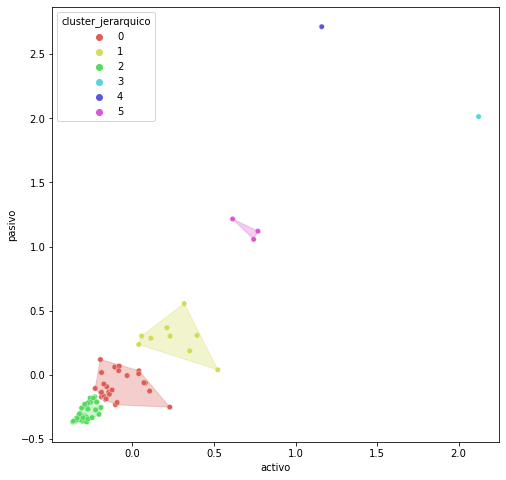

In [ ]:
plot_cluster_hull(cluster, 'cluster_jerarquico')

### 2.3.2. Clustering jerárquico divisivo

El clúster divisivo, también conocido como DIANA (Divisive Analysis), funciona al revés del algoritmo aglomerativo. En este caso, se empieza con todos los individuos en un mismo grupo y se van asignando a grupos disyuntos buscando generar los grupos más heterogéneos. En este punto es importante mencionar que el procedimiento aglomerativo es más fuerte identificando clústers pequeños, mientras que el algoritmo divisivo es mejor generando grupos grandes de individuos.





In [ ]:
cluster_jerarquico_ward = AgglomerativeClustering(affinity = 'euclidean', n_clusters=6, compute_distances=True, linkage='ward').fit(cluster)
cluster['cluster_jerarquico'].value_counts()
cluster['cluster_jerarquico'] = cluster_jerarquico_ward.labels_

In [ ]:
cluster['cluster_jerarquico'].value_counts()

2    45
0    25
1     9
4     3
5     1
3     1
Name: cluster_jerarquico, dtype: int64

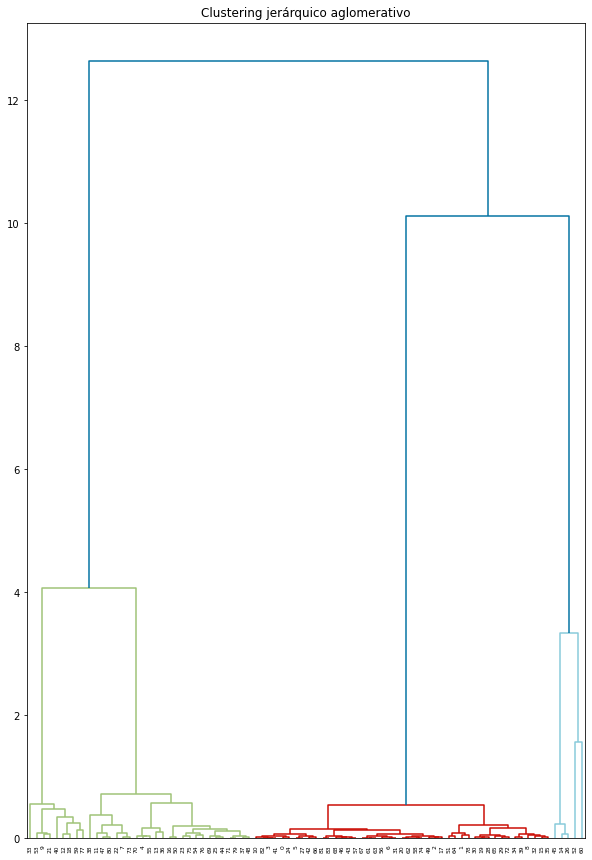

In [ ]:
linkeage_matrix_ward = linkeage_dendrogram(cluster_jerarquico_ward, plot=True)

### 2.4. Procedimiento para la aplicación de métodos de clustering

Los procedimientos de clustering muestran un problema importante y es que son capaces de generar
agrupaciones en los datos así estas no existan sino por mera casualidad. Para evitar esto, es importante iniciar cualquiere proyecto de aprendizaje no supervisado por el análisis de la tendencia de clustering en los datos. Este concepto hace referencia al proceso de establecer si existen agrupaciones reales, es decir, que no son un resultado meramente aleatorio.

Para analizar la tendencia de clustering de un conjunto de datos se compara la información observada
con el resultado de un conjunto de individuos provenientes de una distribución de probabilidad uniforme $p$ variada, donde $p$ es la cantidad de variables que describen a cada registro y que se utilizarán para la agrupación. De esta forma se calcula la estadística Hopkins, definida como:

<center>$H = \frac{\sum{^N_{i=1}y_i}}{\sum{^N_{i=1}y_i}+\sum{^N_{i=1}x_i}}$</center>

donde ${x_i}$ es la distancia entre el individuo $i$ y su vecino mas cercano, para el conjunto de datos observado, y ${y_i}$  es la distancia entre el individuo i y su vecino más cercano, para un conjunto de datos simulados a partir de una distribucion uniforme que mantiene la escala de la informacion real. En este caso, si los datos reales son cercanos a los datos simulados, H será aproximadamente $0.5$, mientras que si la información observada no es aleatoria, H tenderá a $0$ porque se espera que la distribucion de $x_i$ sea sesgada generando un valor grande para $\sum{^N_{i=1}x_i}$

La función hopkins en el paquete pyclustertend realiza pruebas de hipótesis sobre la estadística de
Hopkins:


In [ ]:
!pip install pyclustertend

In [ ]:
from pyclustertend import hopkins
cluster = cluster[['activo','pasivo']]
hopkins(cluster, cluster.shape[0]-1)

0.08926982694854728

Cada vez que se ejecuta la función el resultado cambia por la selección aleatoria de una muestra de tamaño $n$ sobre los datos utilizados. Sin embargo, consistentemente se observa que el valor de H está por
debajo de $0.5$, con lo cual se puede concluir que el conjunto de datos es susceptible de clustering.

Para establecer el número de grupos se pueden utilizar los procedimientos presentados en secciones
anteriores, que analizan el comportamiento de la suma de cuadrados al interior de los clústers o la silueta, como función de K.

Adicionalmente, existe otras formas de selección de K, que se pueden acceder mediante la libreria [$reval$](https://github.com/IIT-LAND/reval_clustering), está libreria aprovecha los métodos de validación de agrupación relativa basados ​​en la estabilidad para determinar el mejor $n$ soluciones de agrupación como los que mejor se generalizan a datos no vistos.

También existen paquetes en otros lenguajes como $NbClust$ que compara múltiples metodologías y de esta forma, la decisión sobre el valor de K.



In [ ]:
!pip install reval

     |████████████████████████████████| 86 kB 3.2 MB/s 
     |████████████████████████████████| 1.1 MB 33.5 MB/s 
  Created wheel for reval: filename=reval-0.1.0-py3-none-any.whl size=30690 sha256=97529721583d5db38238d42348dd7d0dd74e63732a9efa27db6b6183b2a01025
  Stored in directory: /root/.cache/pip/wheels/9e/ea/bf/7446c13757febcd8bd1d5abf6860643809473770fda067cb8f
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=b15c951ae8906709f414deb6bcc5195c5167436d8625f39ebc18aff5b865ad99
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=d0763aad4526544ea153a8a2568c5ed0839ee4a24d725d8c2bba462516eb9c53
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built reval umap-learn pynndescent


In [ ]:
from reval.best_nclust_cv import FindBestClustCV
from sklearn.neighbors import KNeighborsClassifier
from reval.internal_baselines import select_best, evaluate_best
from reval.param_selection import ParamSelection, SCParamSelection

In [ ]:
# Initialize clustering and classifier
classifier = KNeighborsClassifier(n_neighbors=15)
clustering = KMeans()

# Run relatve validation (repeated CV and testing)
findbestclust = FindBestClustCV(nfold=2,
                                nclust_range=list(range(2, 7, 1)),
                                s=classifier,
                                c=clustering,
                                nrand=10,)
metrics, nbest = findbestclust.best_nclust(cluster, iter_cv=10)

print(f'Número optimo de clusters: {nbest}')

Número optimo de clusters: 3


Para calcular el ajuste de una agrupación dada se pueden generar diferentes medidas. Estas difieren según de dónde provenga la información que utilizan y su uso:

* Validación interna: genera medidas de ajuste que posteriormente se pueden utilizar para comparar agrupaciones realizadas mediante diferentes metodologías, utilizando únicamente información proveniente del proceso de clustering. Aquí se puede utilizar la silueta, que es una medida calculada para cada individuo y que mide su distancia promedio en el clúster al que pertenece y la relaciona con la distancia a su vecino más cercano en el clúster vecino. Si la silueta del individuo $i$ se acerca a $1$, entonces el individuo está bien clasificado; si su valor es cercano a $0$, el individuo estaría intermedio entre dos grupos; y si la silueta del individuo $i$ es negativa, es señal de que el elemento debería estar en un clúster diferente.

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

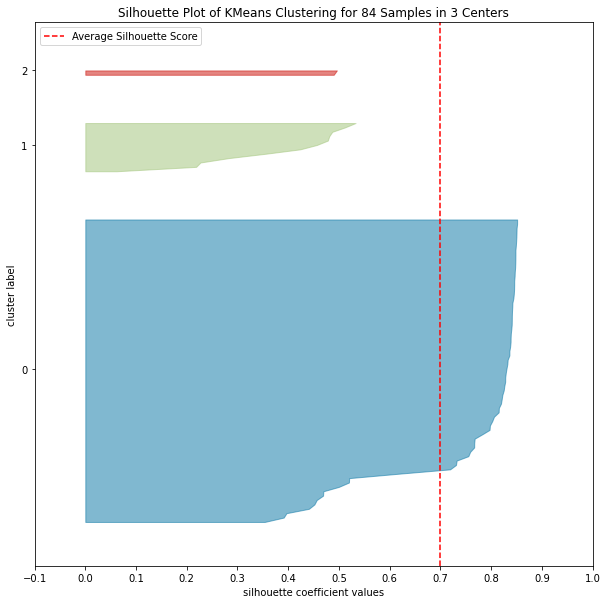

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=2021, n_init=20)
plt.figure(figsize=(10,10))
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(cluster)
visualizer.show();

In [ ]:
cluster.loc[:,'k_mean_clust'] = visualizer.estimator.labels_
cluster.loc[:,'silhouette'] = visualizer.silhouette_samples_

In [ ]:
cluster.groupby('k_mean_clust').agg({'silhouette':['size','mean']})

silhouette          
                   size      mean
k_mean_clust                     
0                    70  0.761535
1                    12  0.376367
2                     2  0.492773

In [ ]:
print(f'Promedio del score silhouette: {visualizer.silhouette_score_:.4f}')

Promedio del score silhouette: 0.7001


In [ ]:
cluster[cluster['silhouette']<0]

,activo,pasivo,k_mean_clust,silhouette


* Indice Dunn: se define como: 
<center> $D = \frac{\text{separacion.min}}{\text{diametro.max}}$ </center>
donde $separacion.min$ es la distancia mínima entre los individuos de un grupo y los individuos de los demás grupos, y $diametro.max$ es la distancia máxima entre los individuos de un mismo clúuster. Según la fórmula, se espera que el índice Dunn sea mayor en clústers mejor ajustados. Esté indice se puede obtener de la libreria validclust.

In [ ]:
!pip install validclust 

In [ ]:
from validclust import dunn
from sklearn.metrics import pairwise_distances

dunn(pairwise_distances(cluster[['activo','pasivo']]), cluster['k_mean_clust'])

0.17190816853837856

* Validación externa: cuando se cuenta con una clase predeterminada a la cual pertenecen los individuos se pueden generar medidas sobre qué tan similares son las agrupaciones resultantes del algoritmo de clustering y las observadas en los datos. Estas medidas son el indice Rand corregido y el Mutual Information, que van de -1 (no hay coincidencia) hasta 1 (total coincidencia). Estos dos indicadores y otros más se encuentran dentro de $sklearn.metrics$, particularmente estos dos se identifican como $\text{rand_score}$ y $\text{mutual_info_score}$

* Validación relativa: evalúa diferentes valores de los parámetros sobre una misma configuración del algoritmo de agrupación. Este es el tipo de validación realizada para establecer el valor de K a partir de las estadísticas de suma de cuadrados al interior del clúster y silueta.


### 2.5. Otras metodologías: clustering basado en densidad

Los procedimientos de agrupación hasta aqui presentados (particional y jerárquico) pueden ser sensibles a la presencia de valores atípicos, requieren que se establezca la cantidad de clústers y son adecuados para casos donde los individuos se conforman de manera esférica en el espacio $p$ dimensional. Sin embargo, en muchos casos esto no es realista, motivando el desarrollo de otros algoritmos como el DBSCAN (Density-Based Clustering Algorithm), que es capaz de identificar clústers de cualquier forma en datos que incluyan ruido

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1500
X, y = make_circles(n_samples=n_samples, factor=0.5, noise=0.05, random_state=2021)
X = StandardScaler().fit_transform(X)

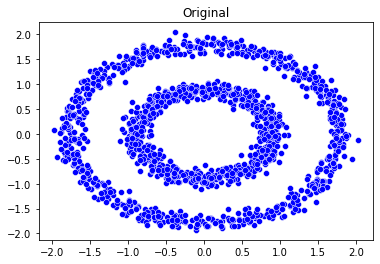

In [ ]:
sns.scatterplot(x = X[:,0], y = X[:,1], color = 'blue')
plt.title('Original');

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=2021).fit(X)

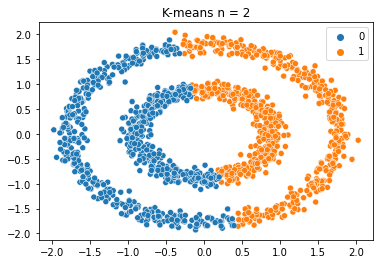

In [ ]:
sns.scatterplot(x = X[:,0], y = X[:,1], hue=kmeans.labels_)
plt.title('K-means n = 2');

En el gráfico anterior el clustering por K-medias no es capaz de identificar los 2 grupos que se pueden observar a simple vista debido a que estos tienen formas lineales, esto puede pasar de la misma manera con elipse y cuando se tiene presencia de ruido en los datos.

El algoritmo del DBSCAN trabaja con diferentes tipos de individuos: *núcleo, borde y outlier*. Los primeros son los que tienen un número mínimo de otros individuos alrededor de sí mismos a una distancia máxima $ϵ$, los segundos son puntos que se encuentran en la vecindad de un individuo núcleo pero que no tienen sufícientes individuos en su propia vecindad, y los terceros son puntos que no son ni núcleo ni vecindad.

Como se puede ver, se requiere definir el valor de $ϵ$ y del mínimo de individuos (MinPts) en la vecindad de un núcleo.

La metodlogía DBSCAN es ventajosa porque no requiere de la definición de $k$ y es robusta a outliers.
Sin embargo, requiere los valores de $ϵ$ y MinPts. Para calcular el $ϵ$ se puede calcular la distancia promedio de los puntos a sus k vecinos más cercanos, encontrando el punto de la máxima curvatura de la distancia, sin embargo, no es regla de oro y al ser un hiperparametro se puede buscar cuales son los valores que minimizán el error.

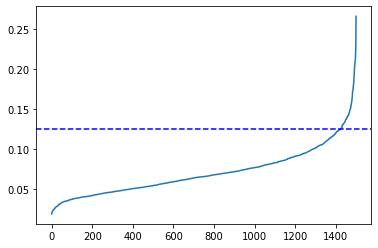

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,4]

fig, ax = plt.subplots()
ax.plot(distances)
ax.axhline(y=0.125, linestyle='--', color='blue');

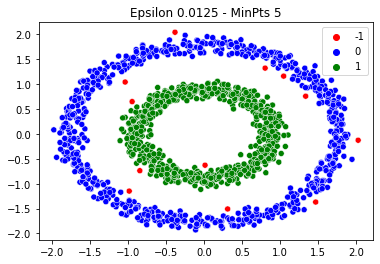

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.125, min_samples=5).fit(X)

sns.scatterplot(x = X[:,0], 
                y = X[:,1],
                hue= dbscan.labels_ ,
                palette = ['red','blue','green'])
plt.title('Epsilon 0.0125 - MinPts 5');

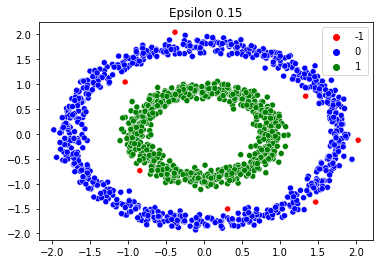

In [ ]:
dbscan = DBSCAN(eps=0.15, min_samples=5).fit(X)

sns.scatterplot(x = X[:,0], 
                y = X[:,1],
                hue= dbscan.labels_ ,
                palette = ['red','blue','green'])
plt.title('Epsilon 0.15');

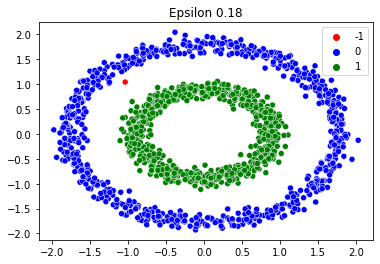

In [ ]:
dbscan = DBSCAN(eps=0.18, min_samples=5).fit(X)

sns.scatterplot(x = X[:,0], 
                y = X[:,1],
                hue= dbscan.labels_ ,
                palette = ['red','blue','green'])
plt.title('Epsilon 0.18');

En la medida que se aumenten $ϵ$ o MinPts se conseguirán menos clústers más sueltos, y viceversa. Ahora, a nuestros datos de empresas:

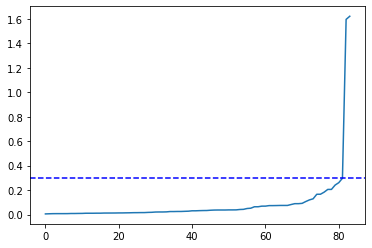

In [ ]:
cluster = cluster[['activo','pasivo']]
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(cluster)
distances, indices = nbrs.kneighbors(cluster)

distances = np.sort(distances, axis=0)
distances = distances[:,2]


fig, ax = plt.subplots()
ax.plot(distances)
ax.axhline(y=0.30, linestyle='--', color='blue');

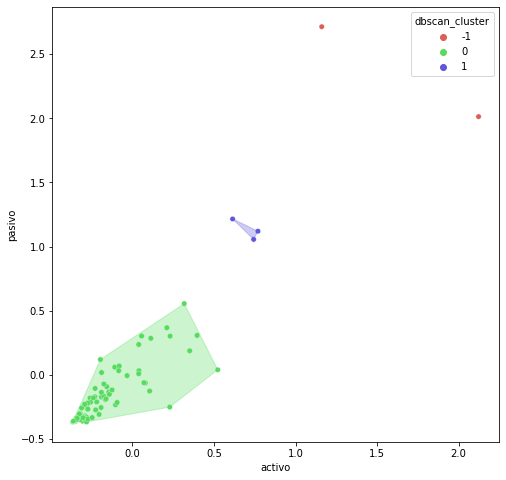

In [ ]:
dbscan = DBSCAN(eps=0.30, min_samples=3).fit(cluster)
cluster['dbscan_cluster'] = dbscan.labels_
plot_cluster_hull(cluster, 'dbscan_cluster',)

## 3. Otros Recursos

https://scikit-learn.org/stable/modules/clustering.html